# Project

## Overview

For this project you must create a data set by simulating a real-world phenomenon of your choosing. In this project you should:

 - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
 - Investigate the types of variables involved, their likely distributions, and their relationships with each other.
 - Synthesise/simulate a data set as closely matching their properties as possible.
 - Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
 
## Introduction

For this project I have choosen to look at the global Carbon dioxide (CO<sub>2</sub>) emissions, I have taken the data from owid co2data<sup>1</sup>.

CO<sub>2</sub> emissions have risen dramatically since the start of the industrial revolution. Most of the world's greenhouse gas emissions come from a relatively small number of countries. China, the United States, Russia and the European Union are the largest emittors on an absolute basis. However when you look at per capita the United State are the largest emittors<sup>2</sup>. 

In this notebook I will examine these countries along with others to examine if there is any correlation between CO<sub>2</sub> emissions and other variables such as population and GDP.

I will examine both absolute emissions and per capita for CO<sub>2</sub>. I will exmaine the main drivers of CO<sup>2</sup> emissions to see if there is a correlation between these and other variables such as population and GDP.

I have included data on the increase in temperature to show the correlation between CO<sub>2</sub> and the increase in global temperatures. As this is a well known phenomenon it will not be explored in this notebook. It is here for illustrative purposes and to highlight the need to change CO<sub>2</sub> emissions if we are to halt climate change.

I have included the codebook from Our World in Data, for information on all the columns and the meanings of each column.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import os

## Reading in the Data

In [78]:
dfco2_Data = pd.read_excel("owid-co2-data.xlsx")
dftemp_data = pd.read_csv("temperature-anomaly.csv")

## Why CO<sub>2</sub> Emissions Matter

I have included the data for the global increase in temperature to show how the world's temperature has been rising since the indutrial revolution. This data was taken from Our World in Data<sup>3</sup>.

In [73]:
dftemp_data = pd.read_csv("temperature-anomaly.csv")

In [74]:
dftemp_data

,Entity,Code,Year,Median temperature anomaly from 1961-1990 average,Upper bound (95% CI),Lower bound (95% CI)
0,Global,NaN,1850,-0.373,-0.339,-0.425
1,Global,NaN,1851,-0.218,-0.184,-0.274
2,Global,NaN,1852,-0.228,-0.196,-0.280
3,Global,NaN,1853,-0.269,-0.239,-0.321
4,Global,NaN,1854,-0.248,-0.218,-0.301
...,...,...,...,...,...,...
675,Tropics,NaN,2015,0.737,0.781,0.690
676,Tropics,NaN,2016,0.763,0.806,0.713
677,Tropics,NaN,2017,0.563,0.607,0.514
678,Tropics,NaN,2018,0.473,0.517,0.424


In [75]:
dftemp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Entity                                             680 non-null    object 
 1   Code                                               0 non-null      float64
 2   Year                                               680 non-null    int64  
 3   Median temperature anomaly from 1961-1990 average  680 non-null    float64
 4   Upper bound (95% CI)                               680 non-null    float64
 5   Lower bound (95% CI)                               680 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 32.0+ KB


In [76]:
dftemp_data.describe()

,Code,Year,Median temperature anomaly from 1961-1990 average,Upper bound (95% CI),Lower bound (95% CI)
count,0.0,680.000000,680.000000,680.000000,680.000000
mean,NaN,1934.500000,-0.081219,-0.041969,-0.128060
std,NaN,49.110047,0.308487,0.306076,0.316637
min,NaN,1850.000000,-0.668000,-0.630000,-0.777000
25%,NaN,1892.000000,-0.302000,-0.263500,-0.355750
50%,NaN,1934.500000,-0.141500,-0.107500,-0.190000
75%,NaN,1977.000000,0.068750,0.093250,0.038750
max,NaN,2019.000000,1.064000,1.096000,1.027000


<AxesSubplot:xlabel='Year', ylabel='Median temperature anomaly from 1961-1990 average'>

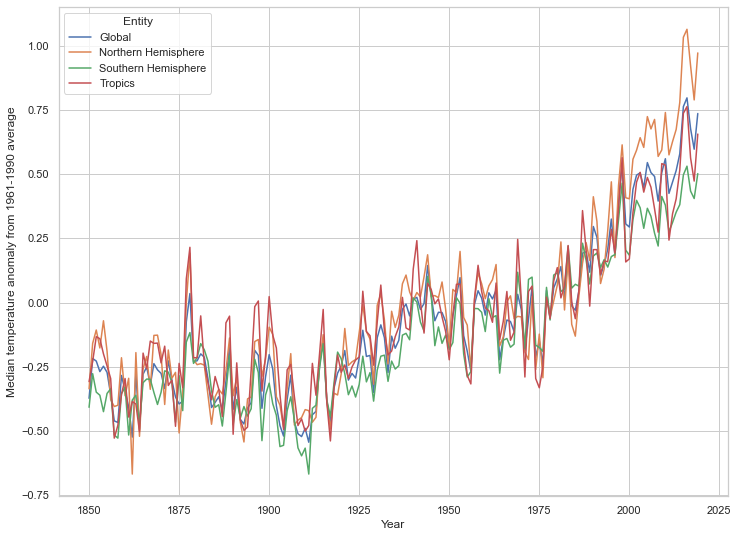

In [77]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dftemp_data, x='Year', y='Median temperature anomaly from 1961-1990 average', hue='Entity')

## Examining the Data

The dataset obtained from Our World in Data is an extremely thorough and large dataset. Therefore throughout this notebook it will be broken down into more accessible dataframes, that will allow for analysis.

Before I begin the analysis the data will be examined, it is important to examine a dataset before analysis. I will examine the data using .head(), .info() and .describe(). I will also ascertain the percentage of NaN in the data as this will limit the analysis if it is extremely prevailant in a variable that variable will not be used.

In [3]:
dfco2_Data.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [4]:
dfco2_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21948 non-null  object 
 1   country                              25204 non-null  object 
 2   year                                 25204 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   consumption_co2                      3976 non-null   float64
 5   co2_growth_prct                      24931 non-null  float64
 6   co2_growth_abs                       23585 non-null  float64
 7   trade_co2                            3976 non-null   float64
 8   co2_per_capita                       23307 non-null  float64
 9   consumption_co2_per_capita           3976 non-null   float64
 10  share_global_co2                     23949 non-null  float64
 11  cumulative_co2              

In [5]:
dfco2_Data.describe()

,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,25204.000000,23949.000000,3976.000000,24931.000000,23585.000000,3976.000000,23307.000000,3976.000000,23949.000000,2.394900e+04,...,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,2.287800e+04,1.353800e+04,8690.000000,8681.000000,6803.000000
mean,1953.225797,267.861942,916.755170,21.098600,5.146889,-2.415624,4.170811,6.567721,4.983979,1.035710e+04,...,8.099506,82.253370,2.046923,29.308135,0.606690,7.072322e+07,2.877088e+11,1569.083895,25568.487454,1.850291
std,53.791369,1521.680894,3373.348275,702.565991,55.259760,182.444942,14.912201,6.927957,17.704994,6.120603e+04,...,9.387477,566.702756,3.534126,199.291118,0.844671,3.795858e+08,2.180094e+12,9066.102799,33319.956208,1.575161
min,1750.000000,0.000000,0.197000,-99.640000,-1895.244000,-1657.998000,0.000000,0.055000,0.000000,0.000000e+00,...,-50.487000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.050000
25%,1925.000000,0.528000,10.319750,-0.450000,-0.011000,-0.892500,0.253000,1.240250,0.010000,6.992000e+00,...,2.514000,2.150000,0.715000,0.535000,0.228000,1.291899e+06,9.828867e+09,6.997000,3270.369000,0.856000
50%,1967.000000,4.857000,57.091000,3.350000,0.059000,1.953000,1.250000,4.359500,0.060000,9.131800e+01,...,5.474000,9.030000,1.111000,3.590000,0.384000,4.880320e+06,3.037019e+10,61.404500,13701.318000,1.407000
75%,1995.000000,42.818000,276.378750,10.460000,1.103000,9.700500,4.657500,9.848500,0.600000,1.147514e+03,...,10.299000,31.055000,1.690000,10.570000,0.607000,1.759622e+07,1.268944e+11,352.884500,35493.775000,2.351000
max,2020.000000,36702.503000,36702.503000,102318.510000,1736.258000,1028.487000,748.639000,57.792000,100.000000,1.696524e+06,...,86.991000,8660.010000,39.812000,3054.000000,8.239000,7.794799e+09,1.136302e+14,162194.290000,317582.498000,13.493000


In [80]:
dfco2_Data.isna().sum().sort_values(ascending = False) / len(dfco2_Data)

share_global_cumulative_other_co2      0.920687
share_global_other_co2                 0.920687
cumulative_other_co2                   0.920687
other_co2_per_capita                   0.920687
other_industry_co2                     0.920687
consumption_co2_per_gdp                0.850778
consumption_co2_per_capita             0.842247
trade_co2_share                        0.842247
trade_co2                              0.842247
consumption_co2                        0.842247
flaring_co2_per_capita                 0.826178
share_global_flaring_co2               0.826139
share_global_cumulative_flaring_co2    0.826139
flaring_co2                            0.826139
cumulative_flaring_co2                 0.826139
ghg_per_capita                         0.795469
methane_per_capita                     0.795390
nitrous_oxide_per_capita               0.795390
total_ghg                              0.793366
nitrous_oxide                          0.793247
methane                                0

From using .isnan it is clear that the majority of columns have greater than 50% NaN and therefore none of these will be used in the analysis. CO<sub>2</sub> and CO<sub>2</sub> growth in production have <1% and <5% NaN and will be used in analysis. CO<sub>2</sub> per capita with <8% NaN will also be examined in this analysis.

## Creating CO2 Emission Dataframe

In order to look at the CO2 emissions I have created a dataframe containing country, year, CO2 emissions and included population to see if there is a correlation between population and emissions.

CO2 emissions are measured in million tonnes.

In [6]:
dfc02emission=dfco2_Data[['country','year','co2', 'population']]

In [7]:
dfc02emission.set_index('country')

,year,co2,population
country,,,
Afghanistan,1949,0.015,7624058.0
Afghanistan,1950,0.084,7752117.0
Afghanistan,1951,0.092,7840151.0
Afghanistan,1952,0.092,7935996.0
Afghanistan,1953,0.106,8039684.0
...,...,...,...
Zimbabwe,2016,10.738,14030338.0
Zimbabwe,2017,9.582,14236599.0
Zimbabwe,2018,11.854,14438812.0


### Examining CO2 Emission Dataframe

In [8]:
dfc02emission.describe()

,year,co2,population
count,25204.000000,23949.000000,2.287800e+04
mean,1953.225797,267.861942,7.072322e+07
std,53.791369,1521.680894,3.795858e+08
min,1750.000000,0.000000,1.490000e+03
25%,1925.000000,0.528000,1.291899e+06
50%,1967.000000,4.857000,4.880320e+06
75%,1995.000000,42.818000,1.759622e+07
max,2020.000000,36702.503000,7.794799e+09


In [9]:
dfc02emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     25204 non-null  object 
 1   year        25204 non-null  int64  
 2   co2         23949 non-null  float64
 3   population  22878 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 787.8+ KB


### Creating the Dataframe for Each Continent


#### Africa

In [10]:
dfafrica=dfc02emission.loc[dfc02emission.country=='Africa']
dfafrica.set_index('country')

,year,co2,population
country,,,
Africa,1884,0.022,1.308486e+08
Africa,1885,0.037,1.315638e+08
Africa,1886,0.048,1.322848e+08
Africa,1887,0.048,1.330118e+08
Africa,1888,0.081,1.337446e+08
...,...,...,...
Africa,2016,1356.719,1.213041e+09
Africa,2017,1384.372,1.244222e+09
Africa,2018,1385.645,1.275921e+09


<AxesSubplot:xlabel='year', ylabel='co2'>

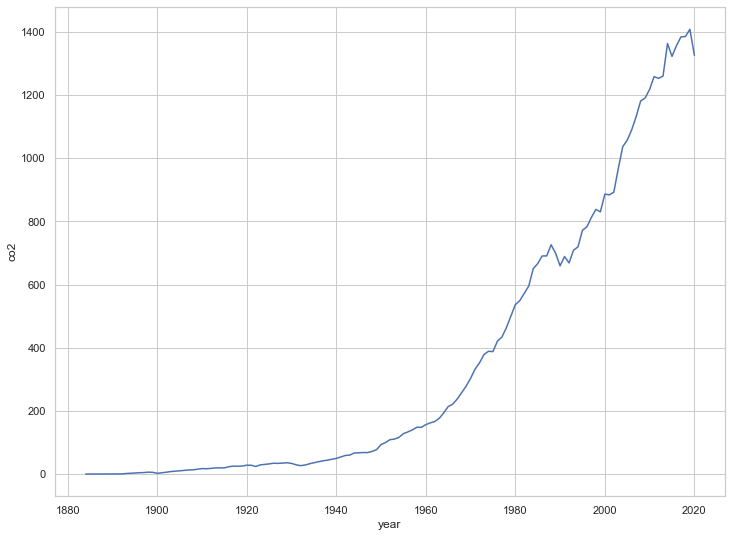

In [82]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfafrica, x='year', y='co2')

#### Asia

In [12]:
dfasia=dfc02emission.loc[dfc02emission.country=='Asia']
dfasia.set_index('country')

,year,co2,population
country,,,
Asia,1830,0.002,7.908359e+08
Asia,1831,0.003,7.936877e+08
Asia,1832,0.002,7.960339e+08
Asia,1833,0.002,7.978705e+08
Asia,1834,NaN,7.997160e+08
...,...,...,...
Asia,2016,19218.166,4.475438e+09
Asia,2017,19653.513,4.517860e+09
Asia,2018,20254.370,4.559478e+09


<AxesSubplot:xlabel='year', ylabel='co2'>

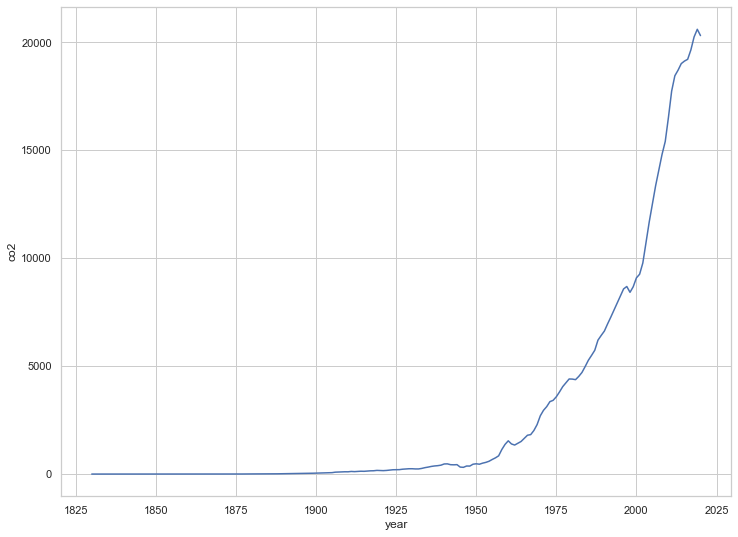

In [13]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfasia, x='year', y='co2')

#### Australia

In [14]:
dfaustralia=dfc02emission.loc[dfc02emission.country=='Australia']
dfaustralia.set_index('country')

,year,co2,population
country,,,
Australia,1860,0.278,1288328.0
Australia,1861,0.509,1350647.0
Australia,1862,0.355,1403026.0
Australia,1863,0.399,1444218.0
Australia,1864,0.267,1486620.0
...,...,...,...
Australia,2016,415.945,24262710.0
Australia,2017,414.751,24584619.0
Australia,2018,416.001,24898153.0


<AxesSubplot:xlabel='year', ylabel='co2'>

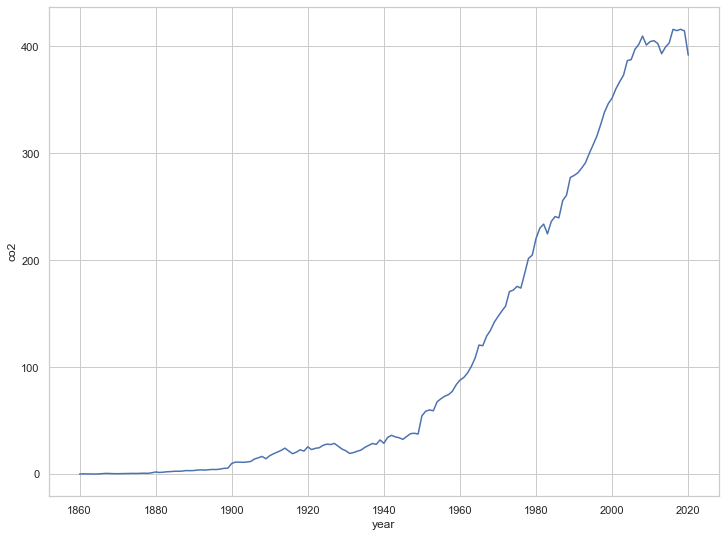

In [15]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfaustralia, x='year', y='co2')

#### Europe

In [16]:
dfeurope=dfc02emission.loc[dfc02emission.country=='Europe']
dfeurope.set_index('country')

,year,co2,population
country,,,
Europe,1750,9.351,150305974.0
Europe,1751,9.351,NaN
Europe,1752,9.354,NaN
Europe,1753,9.354,NaN
Europe,1754,9.358,NaN
...,...,...,...
Europe,2016,5590.253,745441379.0
Europe,2017,5620.307,746596841.0
Europe,2018,5593.057,747608696.0


<AxesSubplot:xlabel='year', ylabel='co2'>

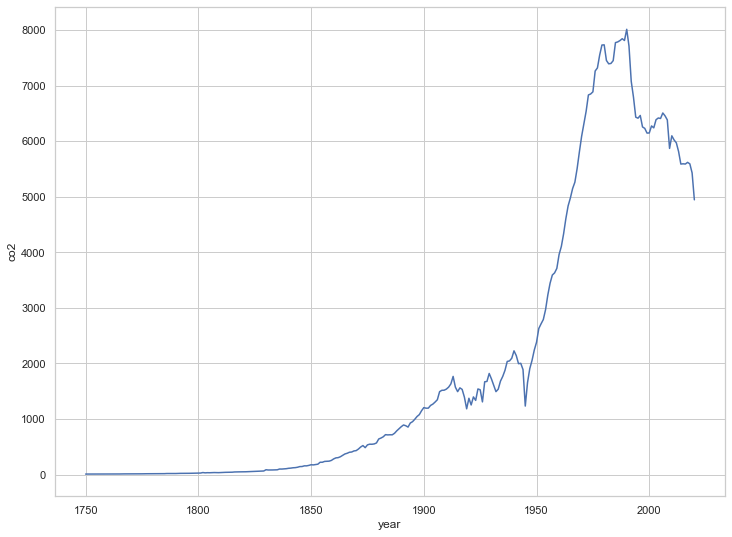

In [17]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfeurope, x='year', y='co2')

#### North America

In [18]:
dfnamerica=dfc02emission.loc[dfc02emission.country=='North America']
dfnamerica.set_index('country')

,year,co2,population
country,,,
North America,1785,0.004,NaN
North America,1786,0.004,NaN
North America,1787,0.004,NaN
North America,1788,0.004,NaN
North America,1789,0.004,NaN
...,...,...,...
North America,2016,6471.360,573814461.0
North America,2017,6412.982,578582963.0
North America,2018,6588.630,582921781.0


<AxesSubplot:xlabel='year', ylabel='co2'>

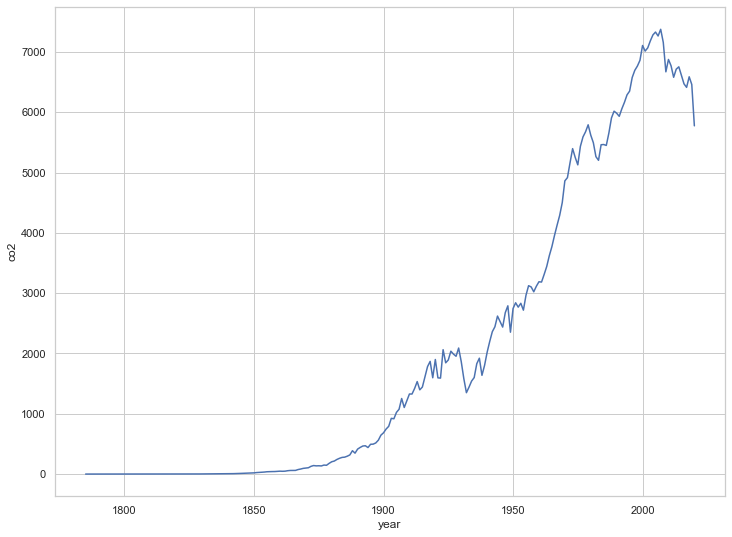

In [19]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfnamerica, x='year', y='co2')

#### South America

In [20]:
dfsamerica=dfc02emission.loc[dfc02emission.country=='South America']
dfsamerica.set_index('country')

,year,co2,population
country,,,
South America,1884,0.004,30121017.0
South America,1885,0.004,30717090.0
South America,1886,0.007,31328092.0
South America,1887,1.092,31954600.0
South America,1888,0.898,32597223.0
...,...,...,...
South America,2016,1164.898,416164871.0
South America,2017,1156.734,419903920.0
South America,2018,1091.450,423581098.0


<AxesSubplot:xlabel='year', ylabel='co2'>

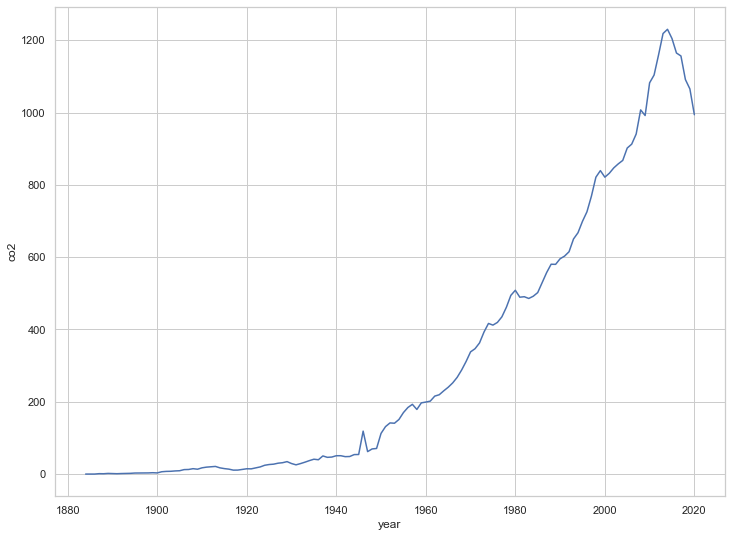

In [21]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfsamerica, x='year', y='co2')

## Global Data

As global data was not available in the original data I created a dataframe including each of the continents.

In [22]:
dfglobal_data = dfco2_Data.copy()
countries =["Asia", "Africa", "Australia","Europe","North America","South America"]

dfglobal_data= dfglobal_data.loc[dfglobal_data['country'].isin(countries)]

In [23]:
dfglobal_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
72,NaN,Africa,1884,0.022,NaN,NaN,NaN,NaN,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,130848603.0,NaN,NaN,NaN,NaN
73,NaN,Africa,1885,0.037,NaN,66.67,0.015,NaN,0.008,NaN,...,NaN,NaN,NaN,NaN,NaN,131563803.0,NaN,NaN,NaN,NaN
74,NaN,Africa,1886,0.048,NaN,30.00,0.011,NaN,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,132284841.0,NaN,NaN,NaN,NaN
75,NaN,Africa,1887,0.048,NaN,0.00,0.000,NaN,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,133011765.0,NaN,NaN,NaN,NaN
76,NaN,Africa,1888,0.081,NaN,69.23,0.033,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,133744628.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20888,NaN,South America,2016,1164.898,1240.096,-3.32,-40.064,75.198,2.799,2.980,...,NaN,NaN,NaN,NaN,NaN,416164871.0,NaN,NaN,NaN,NaN
20889,NaN,South America,2017,1156.734,1238.620,-0.70,-8.164,81.886,2.755,2.950,...,NaN,NaN,NaN,NaN,NaN,419903920.0,NaN,NaN,NaN,NaN
20890,NaN,South America,2018,1091.450,1173.851,-5.64,-65.284,82.401,2.577,2.771,...,NaN,NaN,NaN,NaN,NaN,423581098.0,NaN,NaN,NaN,NaN
20891,NaN,South America,2019,1065.510,1139.737,-2.38,-25.940,74.228,2.494,2.668,...,NaN,NaN,NaN,NaN,NaN,427199425.0,NaN,NaN,NaN,NaN


### Examining the Global Dataframe

In [24]:
dfglobal_data.describe()

,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,1133.000000,1111.000000,180.000000,1127.000000,1102.00000,180.000000,1052.000000,180.000000,1111.000000,1111.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,1.074000e+03,1.590000e+02,220.000000,220.000000,52.000000
mean,1919.406884,1486.416851,4576.630350,26.360781,30.61728,-133.733839,4.060080,7.508461,24.196886,55461.484594,...,28.974259,152.094815,7.688519,81.926667,4.131074,5.110882e+08,2.299493e+11,13134.111045,46862.832795,2.100173
std,65.552783,2903.949952,4658.179283,487.258226,131.98263,500.154555,4.991994,5.933720,31.292559,113145.313246,...,3.650559,16.966428,1.404896,16.558690,0.953121,7.720417e+08,3.158811e+11,11799.845453,33941.898895,0.330698
min,1750.000000,0.002000,245.907000,-57.770000,-685.56800,-1657.998000,0.000000,0.705000,0.000000,0.002000,...,21.394000,121.110000,5.033000,56.130000,2.357000,1.288328e+06,6.036576e+09,405.358000,2178.898000,1.527000
25%,1877.000000,21.269500,634.872000,0.030000,0.00400,-275.696500,0.506250,2.222500,1.015000,345.205500,...,27.708500,139.205000,6.434000,71.370000,3.271000,6.128806e+07,2.334175e+10,1478.416000,15675.508000,1.836250
50%,1926.000000,215.670000,3572.678500,3.690000,2.42600,-39.216000,1.584000,5.987000,4.780000,4192.222000,...,29.143000,153.780000,7.735000,80.190000,4.385000,2.610533e+08,6.495578e+10,8938.315500,35449.087000,2.189500
75%,1973.000000,1385.008500,7045.082750,8.230000,26.35475,82.797000,5.557500,13.901500,40.300000,38650.851500,...,30.950000,162.045000,8.882000,90.445000,4.792000,6.638033e+08,3.209613e+11,24076.400500,72940.038250,2.336000
max,2020.000000,20608.593000,19125.189000,14800.000000,1215.68100,668.203000,19.455000,17.914000,100.000000,532916.155000,...,36.519000,187.380000,9.762000,117.670000,6.130000,4.639847e+09,1.238560e+12,32718.297000,101186.932000,2.590000


In [25]:
dfglobal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 72 to 20892
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             161 non-null    object 
 1   country                              1133 non-null   object 
 2   year                                 1133 non-null   int64  
 3   co2                                  1111 non-null   float64
 4   consumption_co2                      180 non-null    float64
 5   co2_growth_prct                      1127 non-null   float64
 6   co2_growth_abs                       1102 non-null   float64
 7   trade_co2                            180 non-null    float64
 8   co2_per_capita                       1052 non-null   float64
 9   consumption_co2_per_capita           180 non-null    float64
 10  share_global_co2                     1111 non-null   float64
 11  cumulative_co2              

### Plotting the Global Data

I first plotted CO<sub>2</sub> emissions for each continent using a lineplot. Then in order to add in population I created a bubble plot of the same data but taking into account the population of each continent.

<AxesSubplot:xlabel='year', ylabel='co2'>

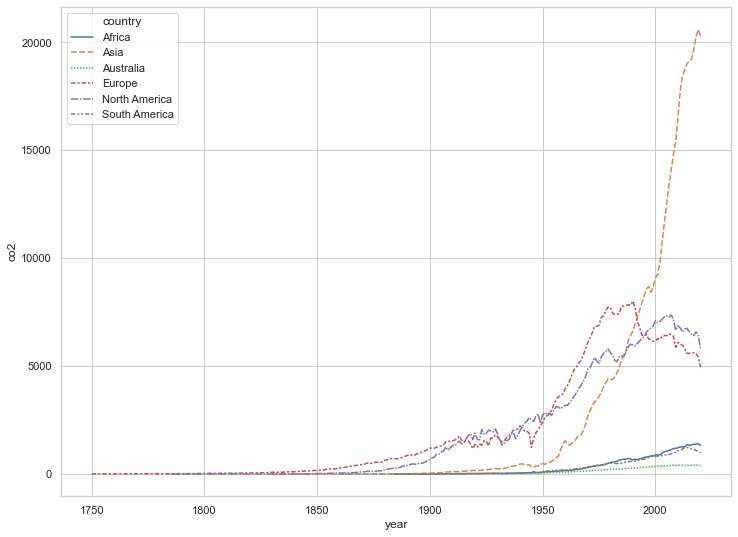

In [26]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfglobal_data, x='year', y='co2', hue='country', style ='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

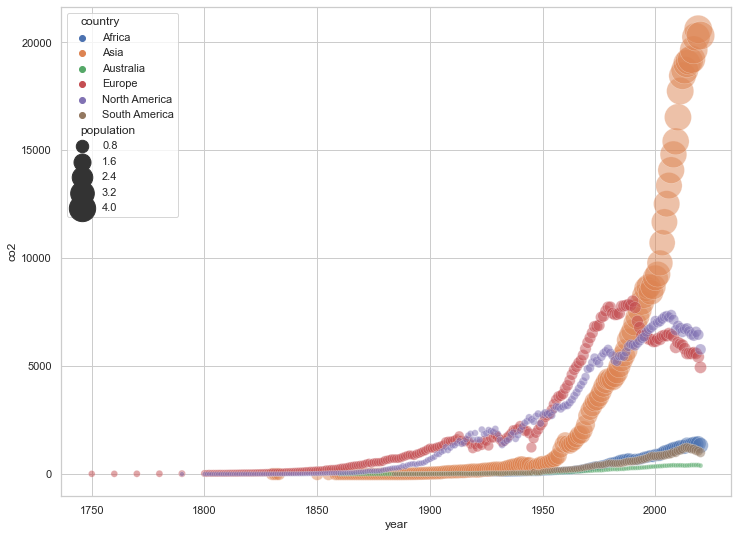

In [28]:
sns.scatterplot(data=dfglobal_data, x="year", y="co2", size="population", hue="country", alpha=0.5, sizes=(20, 800))

Absolute CO<sub>2</sub> emissions are largely made up by Asia, accounting for over 20,000 million tonnes in 2020 with Europe accounting for ~5000 million tonnes and North America for ~6000 million tonnes (5775 taken from the dfnamerica dataframe). 

In the next section of this notebook I will focus on countries within these continents.

## Exmaining Countries in Central America

In [29]:
ca_data = dfco2_Data.copy()
countries =["Guatemala", "Belize", "Panama","Costa Rica","Nicaragua","Honduras","El Salvador"]

ca_data= ca_data.loc[ca_data['country'].isin(countries)]


In [30]:
ca_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
2738,BLZ,Belize,1950,0.018,NaN,NaN,NaN,NaN,0.266,NaN,...,NaN,NaN,NaN,NaN,NaN,68915.0,NaN,NaN,NaN,NaN
2739,BLZ,Belize,1951,0.026,NaN,40.00,0.007,NaN,0.360,NaN,...,NaN,NaN,NaN,NaN,NaN,71239.0,NaN,NaN,NaN,NaN
2740,BLZ,Belize,1952,0.026,NaN,0.00,0.000,NaN,0.349,NaN,...,NaN,NaN,NaN,NaN,NaN,73430.0,NaN,NaN,NaN,NaN
2741,BLZ,Belize,1953,0.029,NaN,14.29,0.004,NaN,0.388,NaN,...,NaN,NaN,NaN,NaN,NaN,75551.0,NaN,NaN,NaN,NaN
2742,BLZ,Belize,1954,0.029,NaN,0.00,0.000,NaN,0.377,NaN,...,NaN,NaN,NaN,NaN,NaN,77688.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,PAN,Panama,2016,10.555,23.169,-2.96,-0.322,12.614,2.615,5.739,...,6.673,5.37,1.33,1.34,0.332,4037073.0,7.946854e+10,123.952,30704.049,1.553
17578,PAN,Panama,2017,11.212,23.903,6.22,0.657,12.691,2.730,5.820,...,NaN,NaN,NaN,NaN,NaN,4106764.0,8.334599e+10,NaN,NaN,NaN
17579,PAN,Panama,2018,10.731,24.104,-4.29,-0.481,13.373,2.569,5.771,...,NaN,NaN,NaN,NaN,NaN,4176868.0,8.603574e+10,NaN,NaN,NaN
17580,PAN,Panama,2019,12.294,24.408,14.57,1.563,12.114,2.895,5.748,...,NaN,NaN,NaN,NaN,NaN,4246440.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

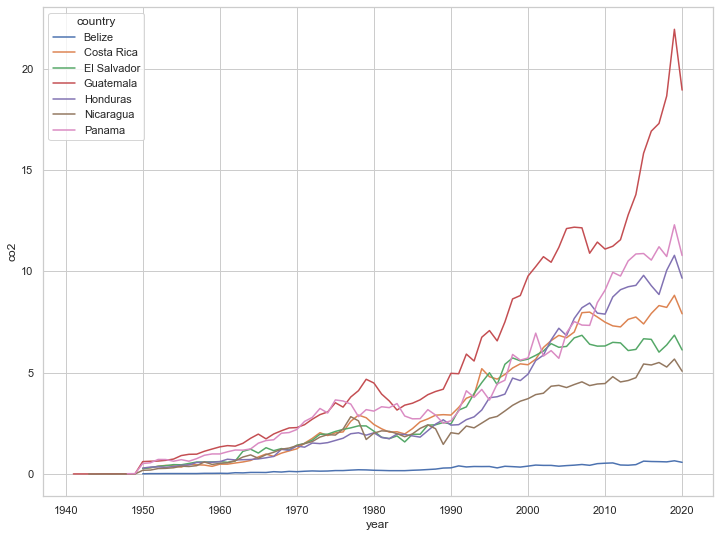

In [31]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=ca_data, x='year', y='co2', hue='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

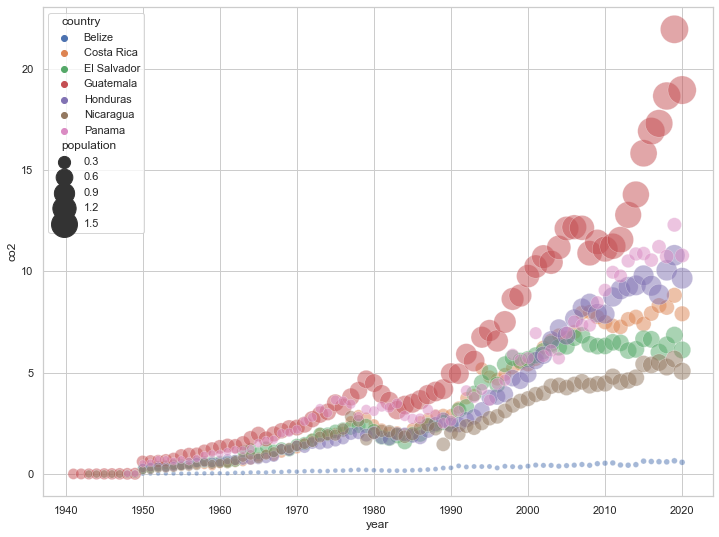

In [32]:
sns.scatterplot(data=ca_data, x="year", y="co2", size="population", hue="country", 
                alpha=0.5, sizes=(20, 800))

From the graphs above it is clear that in Central America Guatemala is the biggest emitter of CO<sub>2</sub>, having doubled it's emissions in the last 20 years. It also has the largest population of the countries in Central America followed by Honduras and Nicaragua. Despite Nicaragua being the third dentist in terms of population it is the second lowest emitter. Belize is lowest emitter of CO<sub>2</sub> and has the lowest population of all countries in Central America, with a population of 397,621 in 2020. This is taken from the command below.

In [85]:
search_name = "Belize"
ca_data.query('country==@search_name')

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
2738,BLZ,Belize,1950,0.018,NaN,NaN,NaN,NaN,0.266,NaN,...,NaN,NaN,NaN,NaN,NaN,68915.0,NaN,NaN,NaN,NaN
2739,BLZ,Belize,1951,0.026,NaN,40.00,0.007,NaN,0.360,NaN,...,NaN,NaN,NaN,NaN,NaN,71239.0,NaN,NaN,NaN,NaN
2740,BLZ,Belize,1952,0.026,NaN,0.00,0.000,NaN,0.349,NaN,...,NaN,NaN,NaN,NaN,NaN,73430.0,NaN,NaN,NaN,NaN
2741,BLZ,Belize,1953,0.029,NaN,14.29,0.004,NaN,0.388,NaN,...,NaN,NaN,NaN,NaN,NaN,75551.0,NaN,NaN,NaN,NaN
2742,BLZ,Belize,1954,0.029,NaN,0.00,0.000,NaN,0.377,NaN,...,NaN,NaN,NaN,NaN,NaN,77688.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,BLZ,Belize,2016,0.623,NaN,-2.86,-0.018,NaN,1.691,NaN,...,13.207,1.02,2.772,0.33,0.897,368399.0,NaN,3.088,8390.657,NaN
2805,BLZ,Belize,2017,0.616,NaN,-1.18,-0.007,NaN,1.638,NaN,...,NaN,NaN,NaN,NaN,NaN,375775.0,NaN,NaN,NaN,NaN
2806,BLZ,Belize,2018,0.605,NaN,-1.79,-0.011,NaN,1.578,NaN,...,NaN,NaN,NaN,NaN,NaN,383071.0,NaN,NaN,NaN,NaN
2807,BLZ,Belize,2019,0.658,NaN,8.90,0.054,NaN,1.687,NaN,...,NaN,NaN,NaN,NaN,NaN,390351.0,NaN,NaN,NaN,NaN


## Exmaining Countries in Europe

I created a dataframe containing each country in Europe, I choose to focus on the continent Europe and not the European Union.

I then used population data taken from worldometer to get the the highest populated countries and lowest populated countries<sup>4</sup> in Europe. In order to cross reference that the countries on this list were also in the data set I searched for the countries to ensure they were present.

I then choose to look at the countries with the highest level of GDP and the lowest level of GDP. As the data for GDP was patchy in the original dataset I took the information from eurostat<sup>5</sup>. 

In [33]:
# Checking to see if all EU countries are in the dataset
search_name = "Holy See"
dfco2_Data.query('country==@search_name')

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp


In [34]:
eu_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands", "Belgium", "Czech Republic", "Greece", "Portugal", "Sweden"
           "Hungary", "Belarus", "Austria", "Serbia", "Switzerland", "Bulgaria", "Denmark", "Finland",
           "Slovakia", "Norway", "Ireland", "Croatia", "Moldova", "Bosnia and Herzegovina", "Albania",
           "Lithuania", "North Macedonia", "Slovenia", "Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

eu_data= eu_data.loc[eu_data['country'].isin(countries)]

eu_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
209,ALB,Albania,1933,0.007,NaN,NaN,NaN,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1032142.0,NaN,NaN,NaN,NaN
210,ALB,Albania,1934,0.007,NaN,0.00,0.000,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1042776.0,NaN,NaN,NaN,NaN
211,ALB,Albania,1935,0.018,NaN,150.00,0.011,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,1053520.0,NaN,NaN,NaN,NaN
212,ALB,Albania,1936,0.128,NaN,600.00,0.110,NaN,0.120,NaN,...,NaN,NaN,NaN,NaN,NaN,1064375.0,NaN,NaN,NaN,NaN
213,ALB,Albania,1937,0.297,NaN,131.43,0.169,NaN,0.276,NaN,...,NaN,NaN,NaN,NaN,NaN,1075341.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,GBR,United Kingdom,2016,399.337,543.496,-5.45,-23.003,144.159,6.023,8.198,...,6.962,52.27,0.788,28.4,0.428,66297944.0,2.460057e+12,2226.110,33577.337,0.863
23843,GBR,United Kingdom,2017,387.565,536.924,-2.95,-11.772,149.359,5.808,8.046,...,NaN,NaN,NaN,NaN,NaN,66727463.0,2.506604e+12,2219.816,33267.134,NaN
23844,GBR,United Kingdom,2018,381.890,539.458,-1.46,-5.676,157.568,5.688,8.035,...,NaN,NaN,NaN,NaN,NaN,67141678.0,2.540210e+12,2212.342,32950.188,NaN
23845,GBR,United Kingdom,2019,369.010,520.696,-3.37,-12.880,151.687,5.464,7.711,...,NaN,NaN,NaN,NaN,NaN,67530161.0,NaN,2177.825,32249.735,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

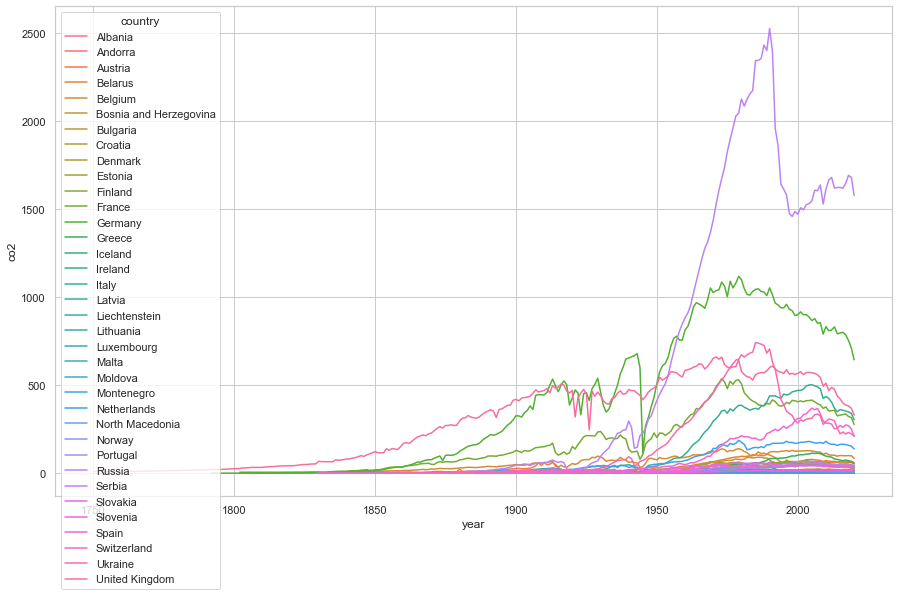

In [35]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_data, x='year', y='co2', hue='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

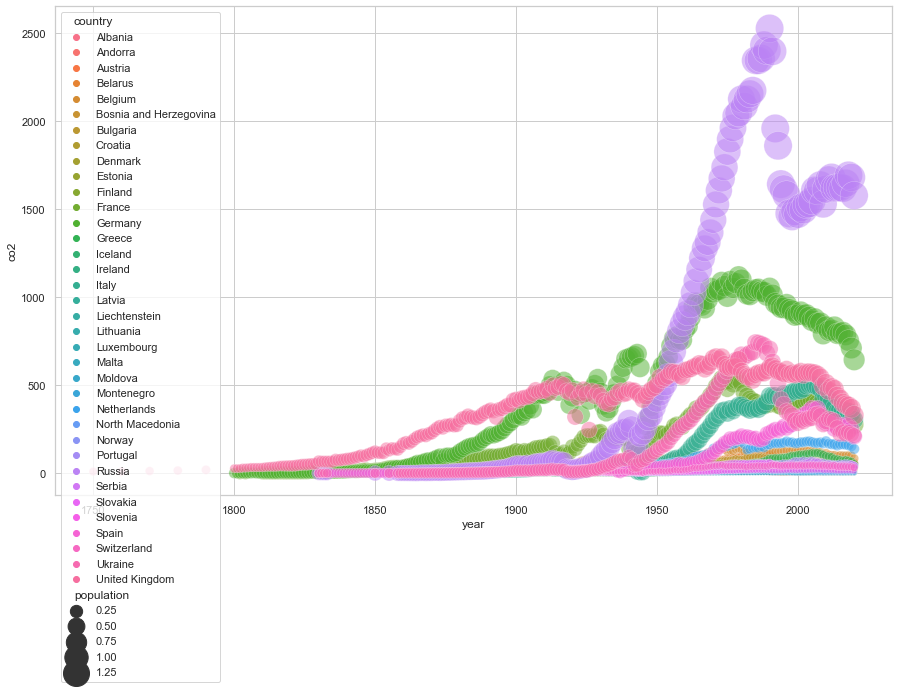

In [36]:
sns.scatterplot(data=eu_data, x="year", y="co2", size="population", hue="country", 
                alpha=0.5, sizes=(20, 800))

As it is difficult to see the data presented in the two plots above I narrowed down the countries represented. First to the ten highest populated countries and then to the ten lowest populated countries.

### Ten Highest Populated Counties

In [37]:
eu_top_pop_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands"]

In [38]:
eu_top_pop_data = eu_top_pop_data.loc[eu_top_pop_data['country'].isin(countries)]

eu_top_pop_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
8539,FRA,France,1802,2.239,NaN,NaN,NaN,NaN,0.077,NaN,...,NaN,NaN,NaN,NaN,NaN,29217510.0,NaN,NaN,NaN,NaN
8540,FRA,France,1803,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29326876.0,NaN,NaN,NaN,NaN
8541,FRA,France,1804,2.176,NaN,-2.78,NaN,NaN,0.074,NaN,...,NaN,NaN,NaN,NaN,NaN,29436651.0,NaN,NaN,NaN,NaN
8542,FRA,France,1805,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29546838.0,NaN,NaN,NaN,NaN
8543,FRA,France,1806,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29657436.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,GBR,United Kingdom,2016,399.337,543.496,-5.45,-23.003,144.159,6.023,8.198,...,6.962,52.27,0.788,28.4,0.428,66297944.0,2.460057e+12,2226.110,33577.337,0.863
23843,GBR,United Kingdom,2017,387.565,536.924,-2.95,-11.772,149.359,5.808,8.046,...,NaN,NaN,NaN,NaN,NaN,66727463.0,2.506604e+12,2219.816,33267.134,NaN
23844,GBR,United Kingdom,2018,381.890,539.458,-1.46,-5.676,157.568,5.688,8.035,...,NaN,NaN,NaN,NaN,NaN,67141678.0,2.540210e+12,2212.342,32950.188,NaN
23845,GBR,United Kingdom,2019,369.010,520.696,-3.37,-12.880,151.687,5.464,7.711,...,NaN,NaN,NaN,NaN,NaN,67530161.0,NaN,2177.825,32249.735,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

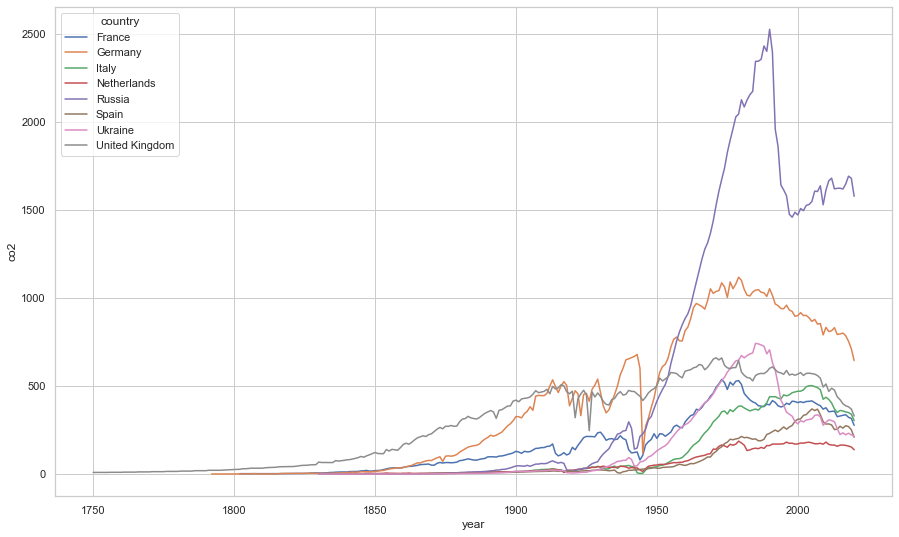

In [39]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_pop_data, x='year', y='co2', hue='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

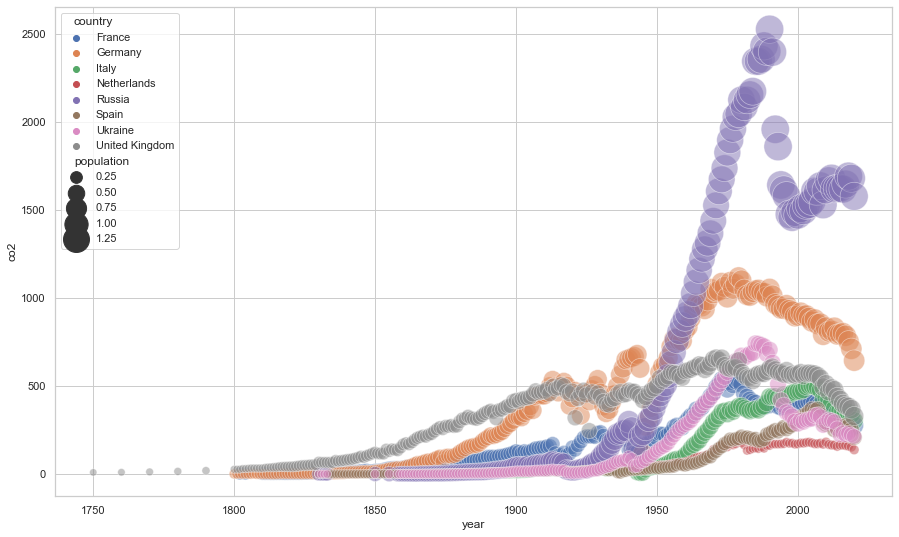

In [40]:
sns.scatterplot(data=eu_top_pop_data, x="year", y="co2", size="population", hue="country", 
                alpha=0.5, sizes=(20, 800))

### Ten Lowest Populated Counties

In [41]:
eu_low_pop_data = dfco2_Data.copy()
countries =["Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

In [42]:
eu_low_pop_data = eu_low_pop_data.loc[eu_low_pop_data['country'].isin(countries)]

eu_low_pop_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
402,AND,Andorra,1990,0.407,NaN,NaN,NaN,NaN,7.461,NaN,...,7.455,0.02,0.364,0.00,0.000,54508.0,NaN,NaN,NaN,NaN
403,AND,Andorra,1991,0.407,NaN,0.00,0.000,NaN,7.177,NaN,...,7.193,0.02,0.351,0.00,0.000,56666.0,NaN,NaN,NaN,NaN
404,AND,Andorra,1992,0.407,NaN,0.00,0.000,NaN,6.907,NaN,...,6.949,0.02,0.339,0.00,0.000,58882.0,NaN,NaN,NaN,NaN
405,AND,Andorra,1993,0.410,NaN,0.90,0.004,NaN,6.730,NaN,...,6.885,0.03,0.492,0.00,0.000,60974.0,NaN,NaN,NaN,NaN
406,AND,Andorra,1994,0.407,NaN,-0.89,-0.004,NaN,6.489,NaN,...,6.667,0.03,0.476,0.00,0.000,62676.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15013,MNE,Montenegro,2016,2.015,NaN,-9.98,-0.224,NaN,3.213,NaN,...,5.455,0.83,1.324,0.18,0.287,627271.0,1.096616e+10,12.472,19890.785,1.06
15014,MNE,Montenegro,2017,2.103,NaN,4.36,0.088,NaN,3.351,NaN,...,NaN,NaN,NaN,NaN,NaN,627563.0,1.144381e+10,NaN,NaN,NaN
15015,MNE,Montenegro,2018,2.400,NaN,14.11,0.297,NaN,3.823,NaN,...,NaN,NaN,NaN,NaN,NaN,627803.0,1.198041e+10,NaN,NaN,NaN
15016,MNE,Montenegro,2019,2.645,NaN,10.21,0.245,NaN,4.212,NaN,...,NaN,NaN,NaN,NaN,NaN,627988.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

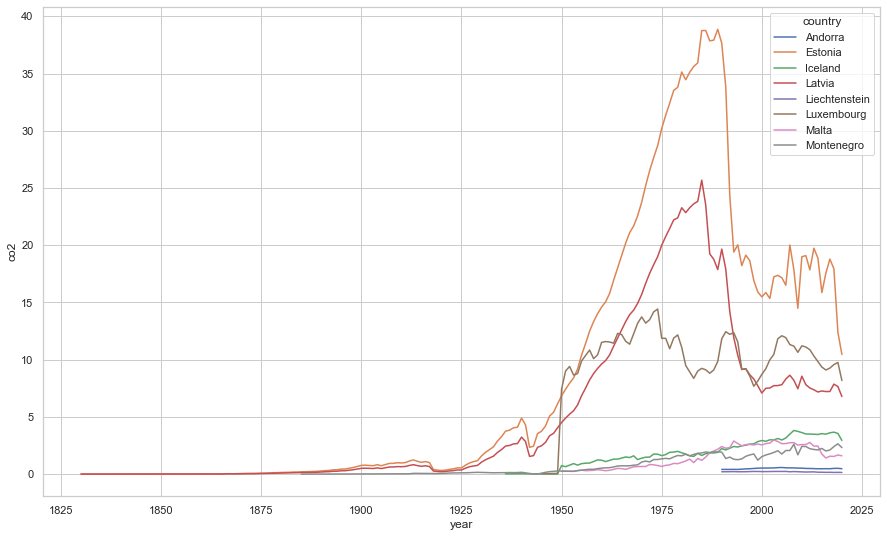

In [43]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_low_pop_data, x='year', y='co2', hue='country')

### Highest and Lowest Combined

In [44]:
eu_top_low_pop_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands", "Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

In [45]:
eu_top_low_pop_data = eu_top_low_pop_data.loc[eu_top_low_pop_data['country'].isin(countries)]

eu_top_low_pop_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
402,AND,Andorra,1990,0.407,NaN,NaN,NaN,NaN,7.461,NaN,...,7.455,0.02,0.364,0.0,0.000,54508.0,NaN,NaN,NaN,NaN
403,AND,Andorra,1991,0.407,NaN,0.00,0.000,NaN,7.177,NaN,...,7.193,0.02,0.351,0.0,0.000,56666.0,NaN,NaN,NaN,NaN
404,AND,Andorra,1992,0.407,NaN,0.00,0.000,NaN,6.907,NaN,...,6.949,0.02,0.339,0.0,0.000,58882.0,NaN,NaN,NaN,NaN
405,AND,Andorra,1993,0.410,NaN,0.90,0.004,NaN,6.730,NaN,...,6.885,0.03,0.492,0.0,0.000,60974.0,NaN,NaN,NaN,NaN
406,AND,Andorra,1994,0.407,NaN,-0.89,-0.004,NaN,6.489,NaN,...,6.667,0.03,0.476,0.0,0.000,62676.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,GBR,United Kingdom,2016,399.337,543.496,-5.45,-23.003,144.159,6.023,8.198,...,6.962,52.27,0.788,28.4,0.428,66297944.0,2.460057e+12,2226.110,33577.337,0.863
23843,GBR,United Kingdom,2017,387.565,536.924,-2.95,-11.772,149.359,5.808,8.046,...,NaN,NaN,NaN,NaN,NaN,66727463.0,2.506604e+12,2219.816,33267.134,NaN
23844,GBR,United Kingdom,2018,381.890,539.458,-1.46,-5.676,157.568,5.688,8.035,...,NaN,NaN,NaN,NaN,NaN,67141678.0,2.540210e+12,2212.342,32950.188,NaN
23845,GBR,United Kingdom,2019,369.010,520.696,-3.37,-12.880,151.687,5.464,7.711,...,NaN,NaN,NaN,NaN,NaN,67530161.0,NaN,2177.825,32249.735,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

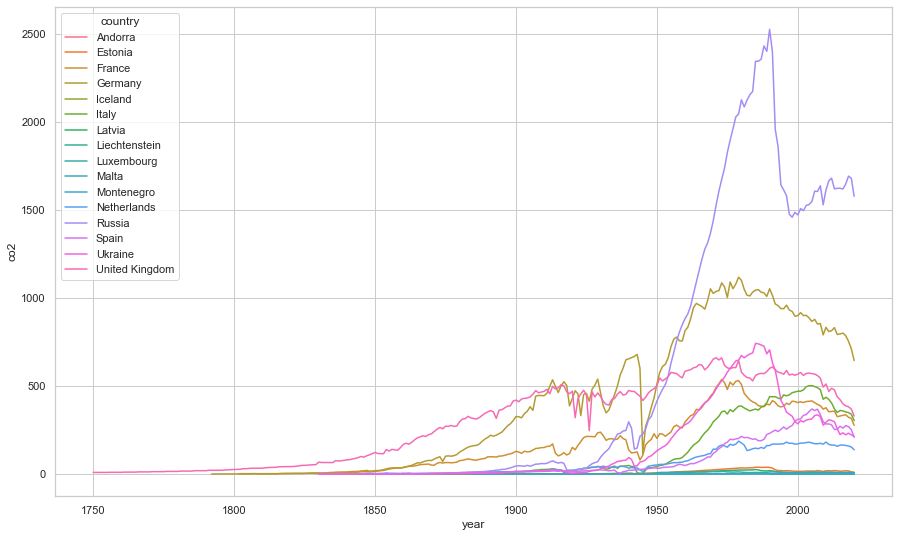

In [46]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_low_pop_data, x='year', y='co2', hue='country')

By combining the highest population data with the lowest population data it is possible to see the difference clearer than when they are plotted on different plots.

The plot for the lowest population countries did not reach 40 on the y-axis, whereas the highest populations reached over 2500, for one country alone.


## GDP and CO<sub>2</sub> Emissions

I will examine below if there is a correlation between GDP and CO<sub>2</sub>. Iw ould expect there to be a positive correlation between emissions on GDP, as it well understood that the richest countries are the largest emitters of CO<sub>2</sub>. 

Developed countries as a whole are responsible to 79% of emissions according to the Center for Global Development<sup>6</sup>.

I wanted to examine this first on Europe and then expand it out across the global data.

### Highest GDP

In [47]:
eu_top_gdp_data = dfco2_Data.copy()
countries =["Luxembourg", "Ireland", "Switzerland","Norway","Denmark","Netherlands",
            "Austria", "Sweden", "Germany", "Iceland"]
eu_top_gdp_data = eu_top_gdp_data.loc[eu_top_gdp_data['country'].isin(countries)]

eu_top_gdp_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
1596,AUT,Austria,1807,0.169,NaN,NaN,NaN,NaN,0.054,NaN,...,NaN,NaN,NaN,NaN,NaN,3124310.0,NaN,NaN,NaN,NaN
1597,AUT,Austria,1808,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3142485.0,NaN,NaN,NaN,NaN
1598,AUT,Austria,1809,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3160765.0,NaN,NaN,NaN,NaN
1599,AUT,Austria,1810,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3179258.0,NaN,NaN,NaN,NaN
1600,AUT,Austria,1811,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3197752.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,CHE,Switzerland,2016,39.193,117.007,1.19,0.462,77.815,4.677,13.963,...,5.575,4.86,0.58,2.19,0.261,8379915.0,5.085793e+11,307.959,36749.343,0.587
21894,CHE,Switzerland,2017,38.183,118.900,-2.58,-1.010,80.718,4.516,14.061,...,NaN,NaN,NaN,NaN,NaN,8455797.0,5.177307e+11,308.694,36505.859,NaN
21895,CHE,Switzerland,2018,36.868,120.080,-3.44,-1.315,83.212,4.324,14.085,...,NaN,NaN,NaN,NaN,NaN,8525614.0,5.319712e+11,313.344,36751.572,NaN
21896,CHE,Switzerland,2019,36.742,116.050,-0.34,-0.126,79.308,4.277,13.508,...,NaN,NaN,NaN,NaN,NaN,8591361.0,NaN,313.934,36542.174,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

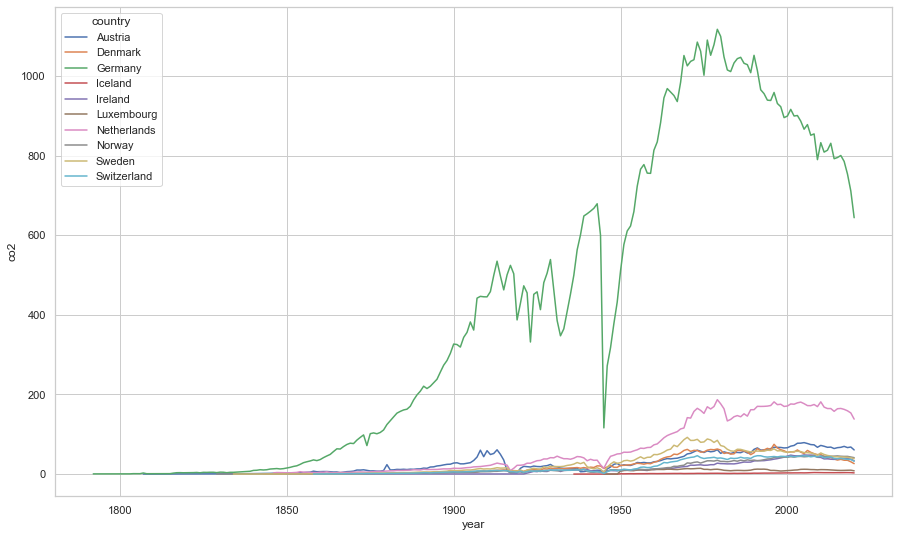

In [48]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_gdp_data, x='year', y='co2', hue='country')

Luxembourg, Ireland and Switzerland are the top three countries in terms of GDP per capita. Luxembourg is one of the lowest emitters with only Iceland emitting less CO<sub>2</sub>. Germany is by far the largest emitter of CO<sub>2</sub> followed by the Netherlands. The Netherlands ranks 6th in terms of GDP per capita and Germany 9th. 

### Lowest GDP

In [51]:
eu_low_gdp_data = dfco2_Data.copy()
countries =["Albania", "Boznia and Herzegovina", "North Macedonia","Serbia","Montenegro",
            "Bulgaria", "Turkey", "Greece", "Croatia", "Slovakia"]
eu_low_gdp_data = eu_low_gdp_data.loc[eu_low_gdp_data['country'].isin(countries)]

eu_low_gdp_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
209,ALB,Albania,1933,0.007,NaN,NaN,NaN,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1032142.0,NaN,NaN,NaN,NaN
210,ALB,Albania,1934,0.007,NaN,0.00,0.000,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1042776.0,NaN,NaN,NaN,NaN
211,ALB,Albania,1935,0.018,NaN,150.00,0.011,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,1053520.0,NaN,NaN,NaN,NaN
212,ALB,Albania,1936,0.128,NaN,600.00,0.110,NaN,0.120,NaN,...,NaN,NaN,NaN,NaN,NaN,1064375.0,NaN,NaN,NaN,NaN
213,ALB,Albania,1937,0.297,NaN,131.43,0.169,NaN,0.276,NaN,...,NaN,NaN,NaN,NaN,NaN,1075341.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,TUR,Turkey,2016,401.240,428.779,5.22,19.908,27.539,5.026,5.371,...,4.96,44.55,0.558,35.18,0.441,79827868.0,1.498503e+12,1669.653,20915.628,1.063
22995,TUR,Turkey,2017,425.329,444.014,6.00,24.089,18.685,5.243,5.474,...,NaN,NaN,NaN,NaN,NaN,81116451.0,1.610457e+12,1770.183,21822.855,NaN
22996,TUR,Turkey,2018,419.437,427.425,-1.39,-5.892,7.988,5.094,5.191,...,NaN,NaN,NaN,NaN,NaN,82340090.0,1.655984e+12,1746.959,21216.411,NaN
22997,TUR,Turkey,2019,399.345,398.699,-4.79,-20.092,-0.646,4.787,4.779,...,NaN,NaN,NaN,NaN,NaN,83429607.0,NaN,1802.849,21609.123,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

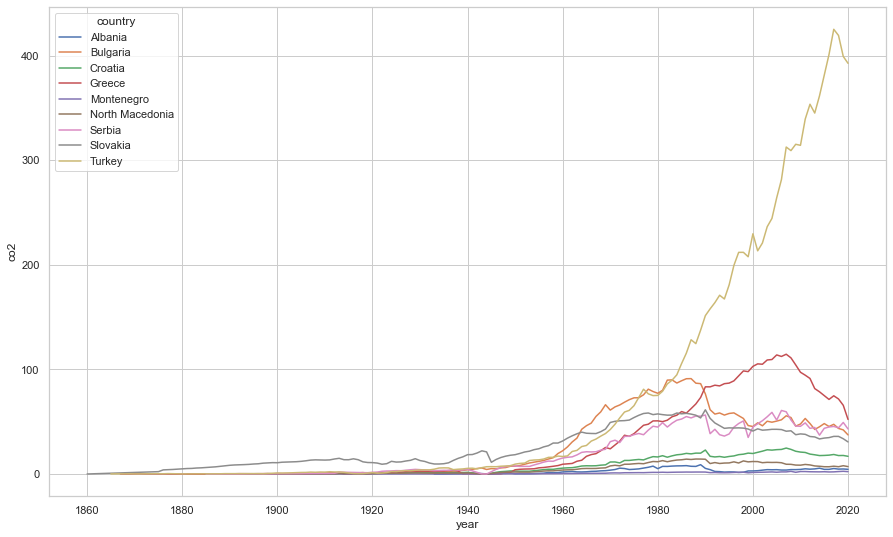

In [52]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_low_gdp_data, x='year', y='co2', hue='country')

There have been incidents of countries with high GDPs reducing their CO<sub>2</sub> emissions without decreasing their GDPs.

I will look into Sweden as an example below.

In [87]:
dfSweden=eu_top_gdp_data.loc[eu_top_gdp_data.country=='Sweden']
dfSweden

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
21548,SWE,Sweden,1834,0.033,NaN,NaN,NaN,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,2972567.0,4.521862e+09,NaN,NaN,NaN
21549,SWE,Sweden,1835,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2997160.0,4.557068e+09,NaN,NaN,NaN
21550,SWE,Sweden,1836,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3021957.0,4.760730e+09,NaN,NaN,NaN
21551,SWE,Sweden,1837,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3046958.0,4.767672e+09,NaN,NaN,NaN
21552,SWE,Sweden,1838,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3072167.0,4.713907e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21730,SWE,Sweden,2016,43.262,69.940,-0.78,-0.341,26.678,4.398,7.111,...,4.7,4.77,0.485,4.94,0.502,9836003.0,4.431636e+11,594.882,60480.052,1.352
21731,SWE,Sweden,2017,42.594,70.547,-1.54,-0.668,27.954,4.300,7.122,...,NaN,NaN,NaN,NaN,NaN,9904895.0,4.545437e+11,613.910,61979.856,NaN
21732,SWE,Sweden,2018,42.095,71.054,-1.17,-0.498,28.959,4.222,7.126,...,NaN,NaN,NaN,NaN,NaN,9971630.0,4.634074e+11,601.817,60350.691,NaN
21733,SWE,Sweden,2019,40.937,67.889,-2.75,-1.159,26.952,4.079,6.764,...,NaN,NaN,NaN,NaN,NaN,10036391.0,NaN,622.703,62046.921,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

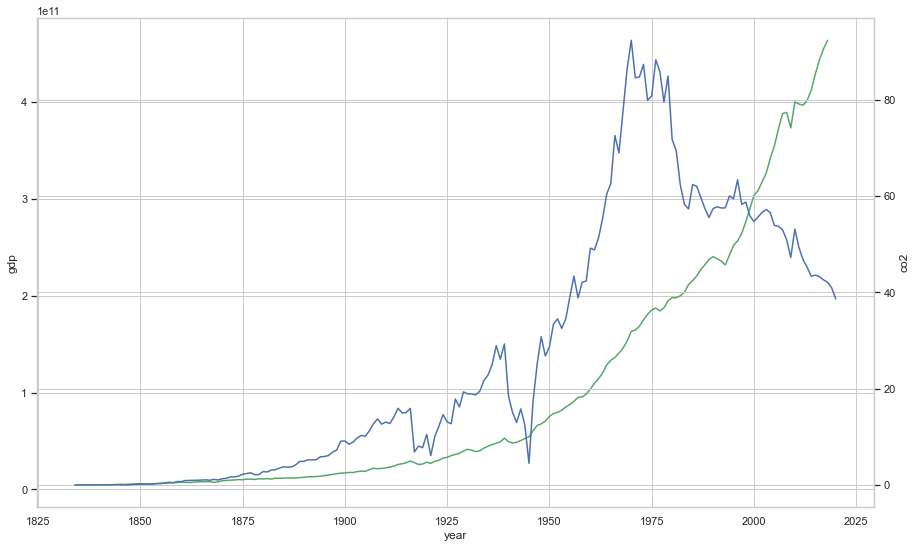

In [97]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=dfSweden, x='year', y='gdp', color="g")
ax2 = plt.twinx()
sns.lineplot(data=dfSweden, x='year', y = 'co2', color="b", ax=ax2)

As seen from Sweden it is possible to both increase your GDP whilst decreasing CO<sub>2</sub> emissions.

I was curious to see this comparison with Irish data. Unfortunately CO<sub>2</sub> emissions are rising for Ireland while GDP is decreasing.

In [99]:
dfIre=eu_top_gdp_data.loc[eu_top_gdp_data.country=='Ireland']
dfIre

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
11390,IRL,Ireland,1850,0.396,NaN,NaN,NaN,NaN,0.057,NaN,...,NaN,NaN,NaN,NaN,NaN,6891380.0,NaN,NaN,NaN,NaN
11391,IRL,Ireland,1851,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6768411.0,NaN,NaN,NaN,NaN
11392,IRL,Ireland,1852,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6651288.0,NaN,NaN,NaN,NaN
11393,IRL,Ireland,1853,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6539839.0,NaN,NaN,NaN,NaN
11394,IRL,Ireland,1854,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6430257.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11556,IRL,Ireland,2016,40.156,42.594,3.79,1.468,2.438,8.551,9.071,...,13.965,16.49,3.511,9.42,2.006,4695790.0,2.686955e+11,180.222,38377.773,0.688
11557,IRL,Ireland,2017,39.133,42.307,-2.55,-1.022,3.173,8.233,8.900,...,NaN,NaN,NaN,NaN,NaN,4753281.0,2.905816e+11,180.829,38045.307,NaN
11558,IRL,Ireland,2018,39.195,42.031,0.16,0.062,2.836,8.134,8.723,...,NaN,NaN,NaN,NaN,NaN,4818694.0,3.143217e+11,184.830,38354.492,NaN
11559,IRL,Ireland,2019,37.275,41.235,-4.90,-1.920,3.959,7.634,8.445,...,NaN,NaN,NaN,NaN,NaN,4882498.0,NaN,184.243,37739.296,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

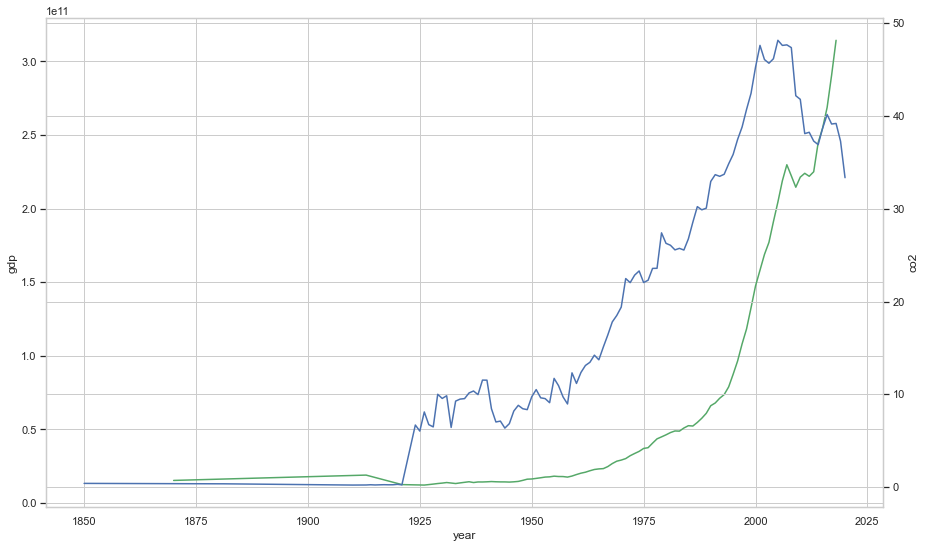

In [100]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=dfIre, x='year', y='gdp', color="g")
ax2 = plt.twinx()
sns.lineplot(data=dfIre, x='year', y = 'co2', color="b", ax=ax2)

## Per Capita CO2

Here I will examine how much CO2 the average person emits.

In [60]:
dfc02percapita=dfco2_Data[['country','year', 'population', 'co2_per_capita']]

In [61]:
dfc02percapita

,country,year,population,co2_per_capita
0,Afghanistan,1949,7624058.0,0.002
1,Afghanistan,1950,7752117.0,0.011
2,Afghanistan,1951,7840151.0,0.012
3,Afghanistan,1952,7935996.0,0.012
4,Afghanistan,1953,8039684.0,0.013
...,...,...,...,...
25199,Zimbabwe,2016,14030338.0,0.765
25200,Zimbabwe,2017,14236599.0,0.673
25201,Zimbabwe,2018,14438812.0,0.821
25202,Zimbabwe,2019,14645473.0,0.748


In [62]:
dfUS_per_capita=dfc02percapita.loc[dfc02percapita.country=='United States']
dfUS_per_capita.set_index('country')
dfUS_per_capita

,country,year,population,co2_per_capita
23847,United States,1800,6000000.0,0.042
23848,United States,1801,6113782.0,0.044
23849,United States,1802,6229723.0,0.046
23850,United States,1803,6347862.0,0.047
23851,United States,1804,6468241.0,0.052
...,...,...,...,...
24063,United States,2016,323015992.0,16.247
24064,United States,2017,325084758.0,16.020
24065,United States,2018,327096263.0,16.434
24066,United States,2019,329064917.0,15.972


<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

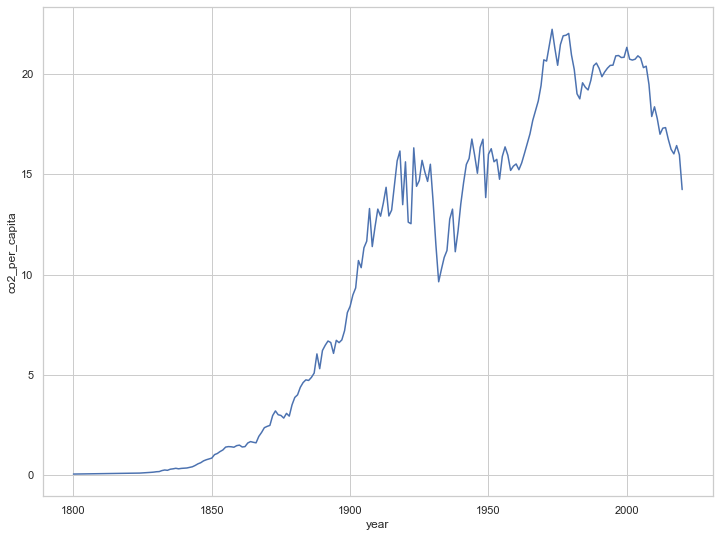

In [63]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfUS_per_capita, x='year', y='co2_per_capita')

In [64]:
dfChina_per_capita=dfc02percapita.loc[dfc02percapita.country=='China']
dfChina_per_capita.set_index('country')
dfChina_per_capita

,country,year,population,co2_per_capita
4602,China,1899,3.994218e+08,0.000
4603,China,1900,4.015797e+08,NaN
4604,China,1901,4.037865e+08,NaN
4605,China,1902,4.060427e+08,0.000
4606,China,1903,4.083487e+08,0.005
...,...,...,...,...
4719,China,2016,1.414049e+09,6.874
4720,China,2017,1.421022e+09,6.981
4721,China,2018,1.427648e+09,7.208
4722,China,2019,1.433784e+09,7.316


<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

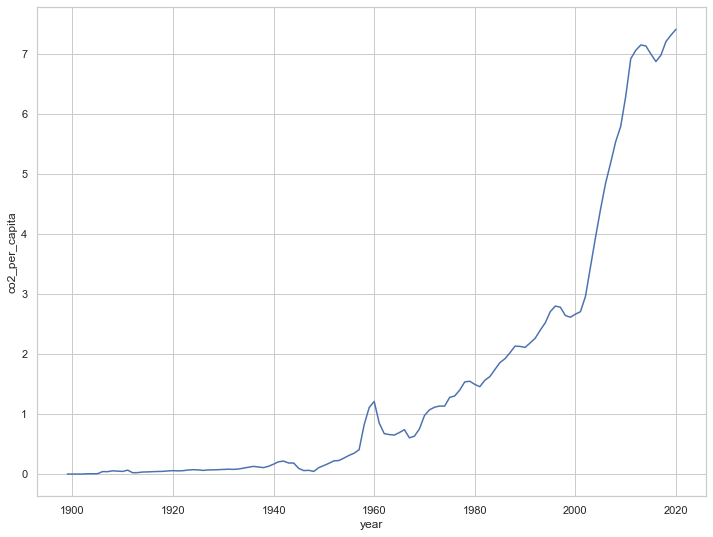

In [65]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfChina_per_capita, x='year', y='co2_per_capita')

In [66]:
dfRussia_per_capita=dfc02percapita.loc[dfc02percapita.country=='Russia']
dfRussia_per_capita.set_index('country')
dfRussia_per_capita

,country,year,population,co2_per_capita
18825,Russia,1830,34361978.0,0.000
18826,Russia,1831,34679300.0,0.000
18827,Russia,1832,34999553.0,0.000
18828,Russia,1833,35322763.0,0.000
18829,Russia,1834,35648958.0,NaN
...,...,...,...,...
19011,Russia,2016,145275374.0,11.142
19012,Russia,2017,145530091.0,11.314
19013,Russia,2018,145734034.0,11.608
19014,Russia,2019,145872260.0,11.513


<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

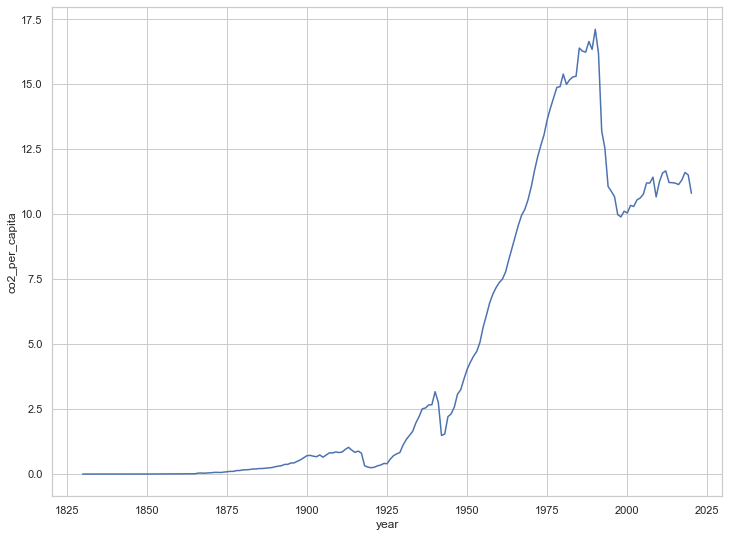

In [67]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfRussia_per_capita, x='year', y='co2_per_capita')

In [68]:
dftop3 = dfco2_Data.copy()
countries =["China", "United States", "Russia"]

dftop3= dftop3.loc[dftop3['country'].isin(countries)]
dftop3

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
4602,CHN,China,1899,0.095,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,399421783.0,NaN,NaN,NaN,NaN
4603,CHN,China,1900,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,401579661.0,3.888000e+11,NaN,NaN,NaN
4604,CHN,China,1901,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,403786465.0,NaN,NaN,NaN,NaN
4605,CHN,China,1902,0.095,NaN,0.00,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,406042669.0,NaN,NaN,NaN,NaN
4606,CHN,China,1903,1.964,NaN,1961.54,1.869,NaN,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,408348748.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24063,USA,United States,2016,5248.024,5576.720,-2.30,-123.747,328.696,16.247,17.264,...,18.059,629.38,1.948,251.7,0.779,323015992.0,1.716256e+13,25560.520,79130.818,1.486
24064,USA,United States,2017,5207.751,5550.772,-0.77,-40.273,343.021,16.020,17.075,...,NaN,NaN,NaN,NaN,NaN,325084758.0,1.759628e+13,25647.389,78894.410,NaN
24065,USA,United States,2018,5375.491,5726.611,3.22,167.739,351.120,16.434,17.507,...,NaN,NaN,NaN,NaN,NaN,327096263.0,1.814065e+13,26556.388,81188.359,NaN
24066,USA,United States,2019,5255.816,5625.784,-2.23,-119.674,369.967,15.972,17.096,...,NaN,NaN,NaN,NaN,NaN,329064917.0,NaN,26291.355,79897.151,NaN


<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

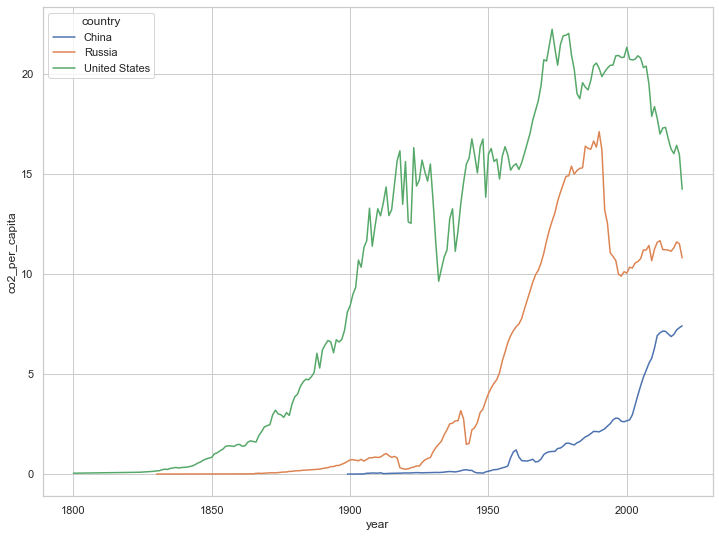

In [69]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dftop3, x='year', y='co2_per_capita', hue='country')

<AxesSubplot:xlabel='year', ylabel='co2'>

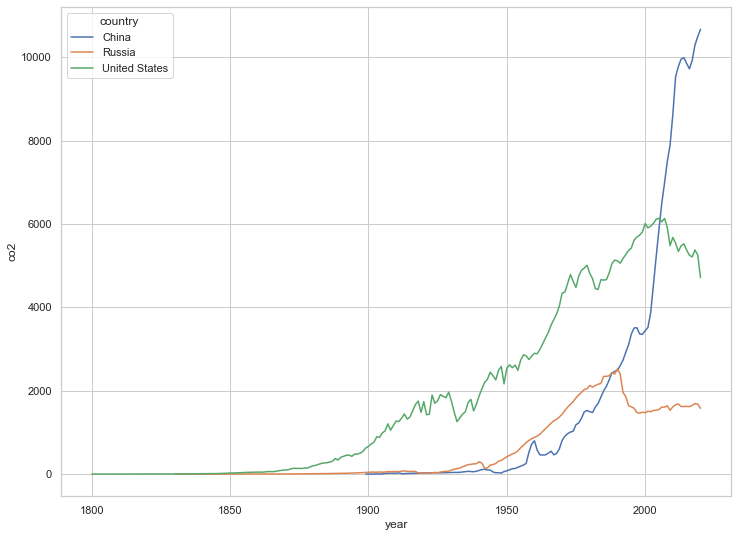

In [70]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dftop3, x='year', y='co2', hue='country')

In [71]:
ca_per_capita = dfco2_Data.copy()
countries =["Guatemala", "Belize", "Panama","Costa Rica","Nicaragua","Honduras","El Salvador"]

ca_per_capita= ca_per_capita.loc[ca_per_capita['country'].isin(countries)]
ca_per_capita

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
2738,BLZ,Belize,1950,0.018,NaN,NaN,NaN,NaN,0.266,NaN,...,NaN,NaN,NaN,NaN,NaN,68915.0,NaN,NaN,NaN,NaN
2739,BLZ,Belize,1951,0.026,NaN,40.00,0.007,NaN,0.360,NaN,...,NaN,NaN,NaN,NaN,NaN,71239.0,NaN,NaN,NaN,NaN
2740,BLZ,Belize,1952,0.026,NaN,0.00,0.000,NaN,0.349,NaN,...,NaN,NaN,NaN,NaN,NaN,73430.0,NaN,NaN,NaN,NaN
2741,BLZ,Belize,1953,0.029,NaN,14.29,0.004,NaN,0.388,NaN,...,NaN,NaN,NaN,NaN,NaN,75551.0,NaN,NaN,NaN,NaN
2742,BLZ,Belize,1954,0.029,NaN,0.00,0.000,NaN,0.377,NaN,...,NaN,NaN,NaN,NaN,NaN,77688.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,PAN,Panama,2016,10.555,23.169,-2.96,-0.322,12.614,2.615,5.739,...,6.673,5.37,1.33,1.34,0.332,4037073.0,7.946854e+10,123.952,30704.049,1.553
17578,PAN,Panama,2017,11.212,23.903,6.22,0.657,12.691,2.730,5.820,...,NaN,NaN,NaN,NaN,NaN,4106764.0,8.334599e+10,NaN,NaN,NaN
17579,PAN,Panama,2018,10.731,24.104,-4.29,-0.481,13.373,2.569,5.771,...,NaN,NaN,NaN,NaN,NaN,4176868.0,8.603574e+10,NaN,NaN,NaN
17580,PAN,Panama,2019,12.294,24.408,14.57,1.563,12.114,2.895,5.748,...,NaN,NaN,NaN,NaN,NaN,4246440.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='co2_per_capita'>

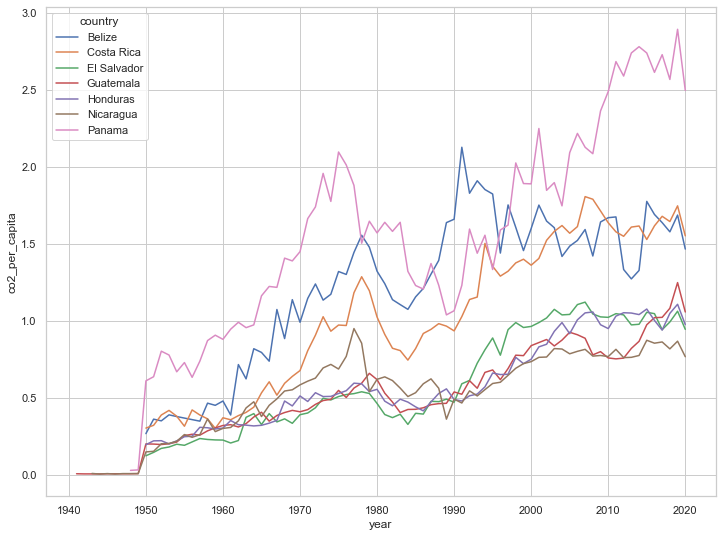

In [72]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=ca_per_capita, x='year', y='co2_per_capita', hue='country')

## References
<sup>1</sup>[owidco2data](https://github.com/owid/co2-data/blob/master/owid-co2-data.xlsx)  
<sup>2</sup>[Global Emissions](https://www.c2es.org/content/international-emissions/)  
<sup>3</sup>[CO<sub>2</sub> and Greenhouse Gas Emissions](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions)  
<sup>4</sup>[Countries in Europe](https://www.worldometers.info/geography/how-many-countries-in-europe/)  
<sup>5</sup>[Eurostat GDP](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=File:Volume_indices_of_GDP_and_AIC_per_capita,_2020,_(EU%3D100)_update_December.png)  
<sup>6</sup>[Developed Countries Are Responsible for 79 Percent of Historical Carbon Emissions](https://www.cgdev.org/media/who-caused-climate-change-historically)  